## Hands on session 4

### First we load the quasar data

c:\Universita\Galaxies\Hands_on_Session_4\MAGG_spectra_merged.fits
J010619.24+004823.3
4.4402
J012403.77+004432.7
3.8359
J013340.31+040059.7
4.1709
J013724.36-422417.3
3.975
J015741.56-010629.6
3.5645
J020944.61+051713.6
4.1846
J024401.84-013403.7
4.044
J033413.42-161205.4
4.38
J033900.98-013317.7
3.204
J094932.26+033531.7
4.1072
J095852.19+120245.0
3.2746
J102009.99+104002.7
3.1528
J111008.61+024458.0
4.1582
J111113.79-080402.0
3.93
J120917.93+113830.3
3.0836
J123055.57-113909.3
3.557
J124957.23-015928.8
3.6337
J133254.51+005250.6
3.5071
J142438.10+225600.7
3.634
J162116.92-004250.8
3.71
J193957.25-100241.5
3.787
J200324.14-325144.8
3.785
J205344.72-354655.2
3.49
J221527.29-161133.0
4.0
J230301.45-093930.7
3.4774
J231543.56+145606.4
3.3971
J233446.40-090812.2
3.3261
J234913.75-371259.2
4.24


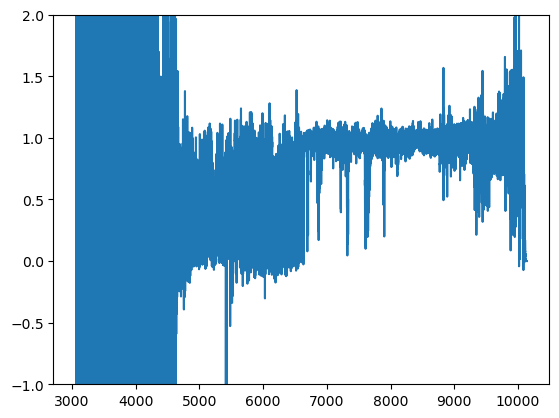

Filename: c:\Universita\Galaxies\Hands_on_Session_4\MAGG_spectra_merged.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  J010619.24+004823.3    1 BinTableHDU     17   26072R x 3C   ['D', 'D', 'D']   
  2  J012403.77+004432.7    1 BinTableHDU     17   25429R x 3C   [D, D, D]   
  3  J013340.31+040059.7    1 BinTableHDU     17   25429R x 3C   [D, D, D]   
  4  J013724.36-422417.3    1 BinTableHDU     17   25430R x 3C   [D, D, D]   
  5  J015741.56-010629.6    1 BinTableHDU     17   28401R x 3C   [D, D, D]   
  6  J020944.61+051713.6    1 BinTableHDU     17   28402R x 3C   [D, D, D]   
  7  J024401.84-013403.7    1 BinTableHDU     17   25429R x 3C   [D, D, D]   
  8  J033413.42-161205.4    1 BinTableHDU     17   26713R x 3C   [D, D, D]   
  9  J033900.98-013317.7    1 BinTableHDU     17   26662R x 3C   [D, D, D]   
 10  J094932.26+033531.7    1 BinTableHDU     17   26719R x 3C   [D, D, D]   
 11  J095852.19+120245.0

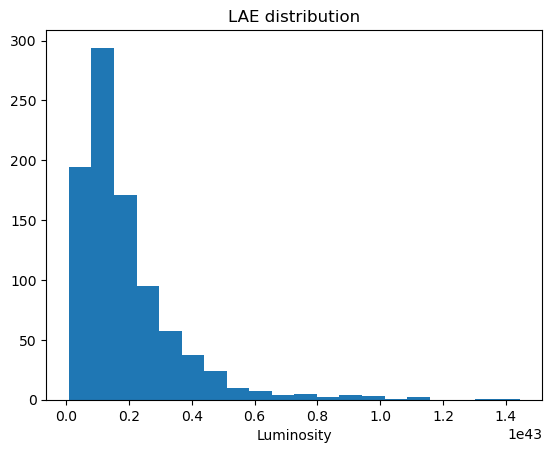

       FIELD              z       ...         LumErr        
------------------- ------------- ... ----------------------
J010619.24+004823.3      2.926344 ...  7.945311826009941e+40
J010619.24+004823.3 3.10823812893 ... 1.0097005994398644e+41
J010619.24+004823.3 3.12134996922 ...  9.639746500686158e+40
J010619.24+004823.3 3.20808559003 ...  8.957599905770926e+40
J010619.24+004823.3    3.21117682 ... 1.5087090345596136e+41
J010619.24+004823.3        3.2247 ...  1.569898366629773e+41
J010619.24+004823.3       3.27537 ... 1.6622059749643417e+41
J010619.24+004823.3        3.3267 ...  1.772353031854091e+41
J010619.24+004823.3       3.32725 ... 2.8259290851745787e+41
J010619.24+004823.3        3.3276 ... 1.6414110933974275e+41
                ...           ... ...                    ...
J234913.75-371259.2      4.303664 ... 2.3417530430861282e+41
J234913.75-371259.2 4.38423212931 ... 2.2509935766450925e+41
J234913.75-371259.2     4.3840295 ... 1.9886266061028305e+41
J234913.75-371259.2     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic_2d
from scipy.stats import linregress
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from datetime import datetime 
from pathlib import Path
import random
from matplotlib import colormaps
from astropy.table import Table
from astropy.io import fits 
from scipy.ndimage import gaussian_filter
THISDIR=os.getcwd()

print(f"{THISDIR}\\MAGG_spectra_merged.fits")
qsolist= fits.open(f"{THISDIR}\\MAGG_spectra_merged.fits")
num_qso=len(qsolist)-1
for exx in range(num_qso):
    #print filed name and quasar redshift
    print(qsolist[exx+1].header["FIELD"])
    print(qsolist[exx+1].header["z_QSO"])
#plot the spectrum 0
plt.figure()
plt.plot(qsolist[1].data["wave"],qsolist[1].data["flux"])
plt.ylim(-1, 2)
plt.show()
print(qsolist.info())

lae = Table.read(f"{THISDIR}\\MAGG_LAEs.fits")
plt.figure()
plt.title('LAE distribution')
plt.xlabel('Luminosity')
plt.hist(lae["Lum"],bins=20)
plt.show()
print(lae)


      z_corr      
------------------
2.9230697815405082
3.1048122270941625
3.1179131332863057
 3.204576424374113
3.2076650765357932
3.2211769794175407
 3.271804725185782
3.3230919205732654
 3.323641461922634
 3.323991170054051
               ...
3.5220304322031324
 3.526722884463267
3.6795144481131676
3.6986734578843543
 3.727554353708925
 3.764839538701442
3.7752113209973768
 4.093924978444983
 4.096578983695681
 4.218234828730148
Length = 24 rows


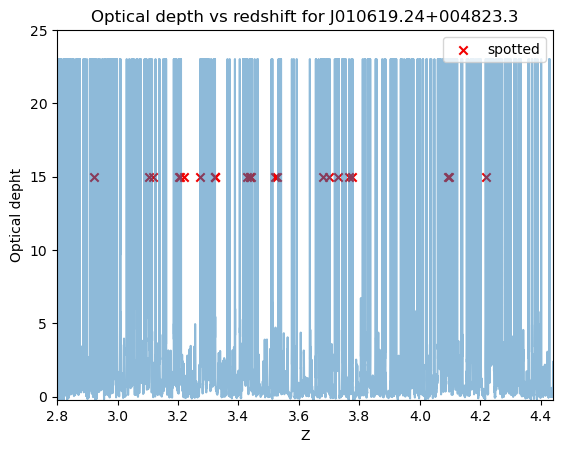

      z_corr      
------------------
 2.833910463272522
 3.078326203564267
 3.104452398479364
3.1869185023257693
 3.394015985906859
 3.392510136588074
3.4648811848107415
 3.491144063208952
 3.547122534668225
 3.548152680042483
 3.834165375486531


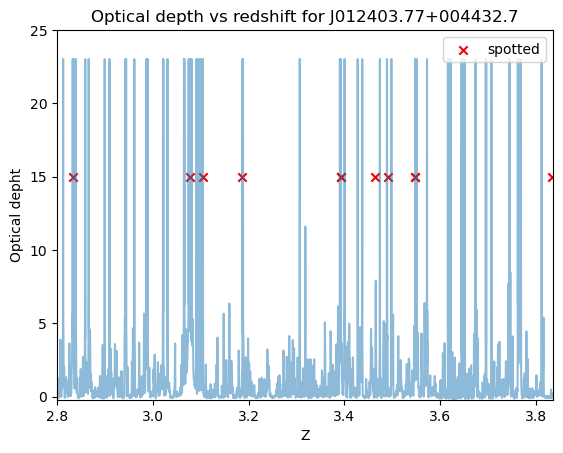

      z_corr      
------------------
2.9918248548183732
3.0770725585242213
3.1387570306897863
3.1888431074983123
 3.283685788796137
3.3001250736166963
 3.328826351841234
3.5382611998534204
3.5953946550161042
 3.692293782401224
               ...
3.9670964304006477
 3.993762175004216
 4.045329740403142
 4.047173421185685
 4.047161018227271
  4.04928583461229
 4.110045124530718
4.1192774192001185
 4.169015907148471
 4.169695340089509
Length = 24 rows


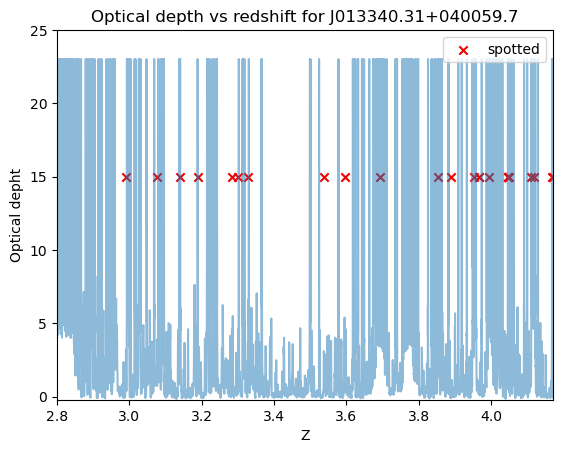

      z_corr      
------------------
 2.886460368374618
3.0000479465348406
3.0608687736439455
  3.07260414444043
 3.074839113910998
 3.087568489894566
3.1217489050073506
 3.127809006379024
 3.152447341601082
 3.155575276916797
               ...
3.5614542608403514
 3.603657758578436
 3.604690552462232
3.6705219533053097
3.8176080227661755
  3.83160651113065
   3.8522622717043
3.9735690283301257
 3.972849628745497
 3.973349211790378
Length = 30 rows


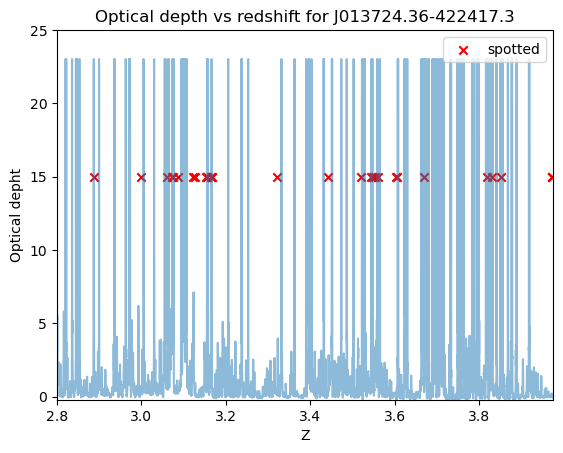

      z_corr      
------------------
 2.836547993163657
 2.963152328397401
 2.964611110888453
3.0894428043700373
3.1683815167293345
 3.258829406967134
3.3585623167598166
 3.371021917899149
 3.373831499005269
3.3890368824975576
 3.387508158380222
3.3885772660962674
3.3883074912520317
 3.388587257757165
 3.523018060972014
 3.540421879536707


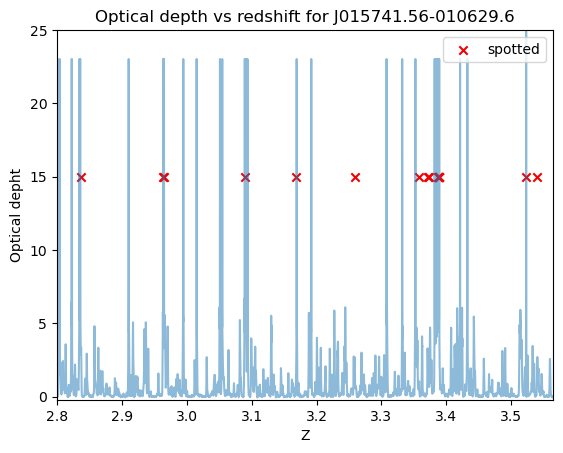

      z_corr      
------------------
 2.832949996074424
 2.930508363673557
3.1051660230638434
3.1698120489082737
3.2455865776948767
 3.257005077064227
3.4395637124907323
3.7084802730553683
 3.899800595922997
3.9833508643488957
 4.154308182307175


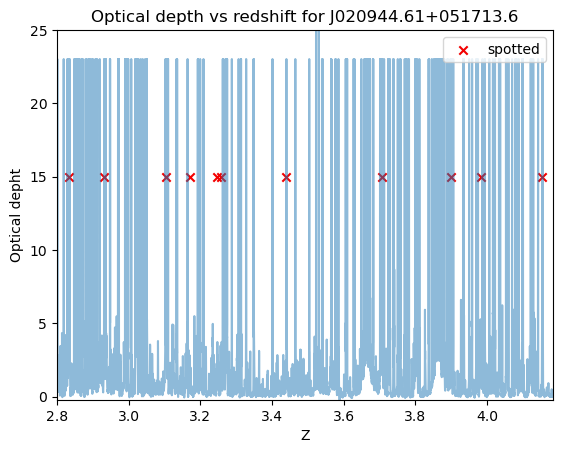

      z_corr      
------------------
  2.85574296740867
3.1188097598062305
 3.122459369749055
 3.135275086771854
3.1352958284007615
3.3469668700118502
3.3962665671777215
3.4075613987809588
 3.408520621247917
 3.432264366420399
               ...
3.6449702142557716
3.7357475156449733
3.7333489613233404
 3.747771027087481
  3.93148415262935
3.9624982680555627
3.9646065085049607
3.9681335648018203
 4.030321662228607
4.0307143345018845
Length = 24 rows


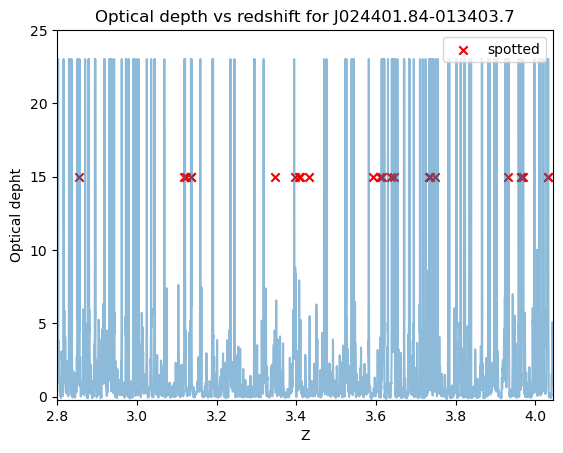

      z_corr      
------------------
   2.8598785213596
 2.884358090558769
2.8849076319081384
2.9272622824531496
2.9258234832838923
2.9278617821070068
3.0532871013548313
 3.095998556848212
3.1605975393952708
3.2356499002277435
               ...
3.5697760364746065
3.6074989464191543
 3.759685536823491
 3.906944633464795
3.9832109810963288
4.0346274998397345
 4.058793899122466
 4.138211616601109
 4.153548816078955
4.1551564743173826
Length = 23 rows


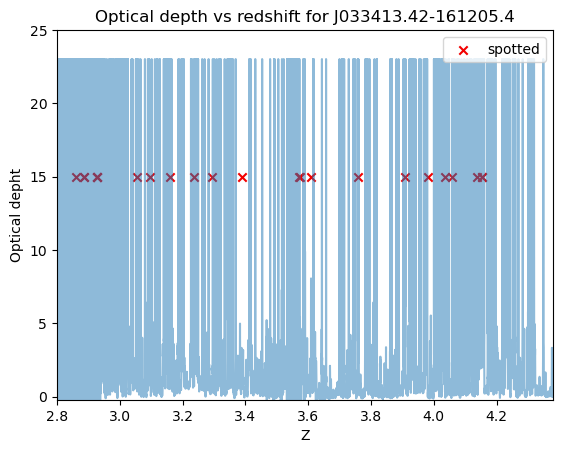

      z_corr      
------------------
2.8095305420964927
2.8349788206947673
 2.834789460845676
3.0412862715620776
 3.075700768069074
3.0845110416598938
 3.191411821603531
3.2034917396287534
 3.202150432702248
3.2007503834730757
3.1990171805206424
3.2028362885067763


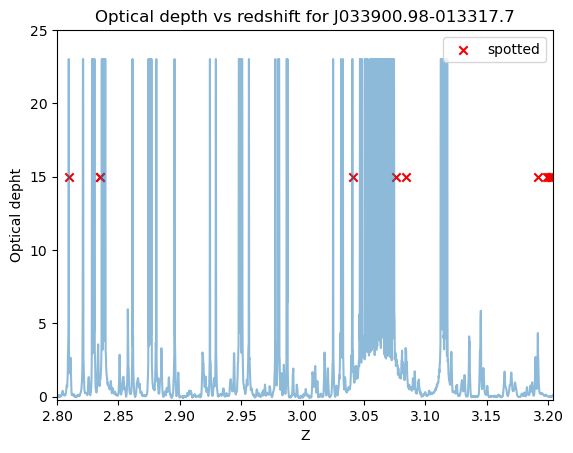

      z_corr      
------------------
  2.80236642131629
 3.411767911039643
3.5475545826382997
3.5947821662030806
 3.635991834687247
3.8351445582544974
 3.927617379861971
 4.058877829074006


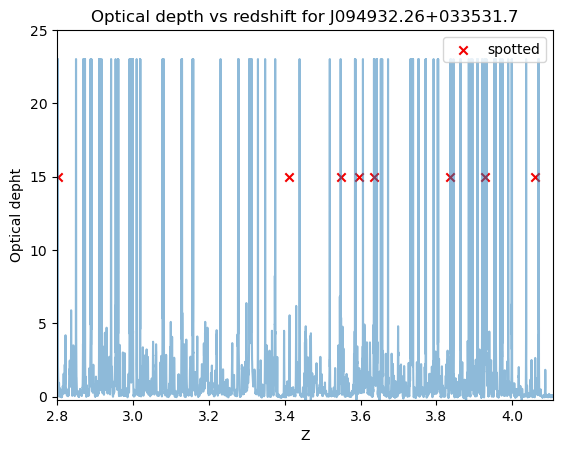

      z_corr      
------------------
  3.01156192544637
3.0777366955713075
3.1041146803410244
 3.108281202935332
3.1584992906067706


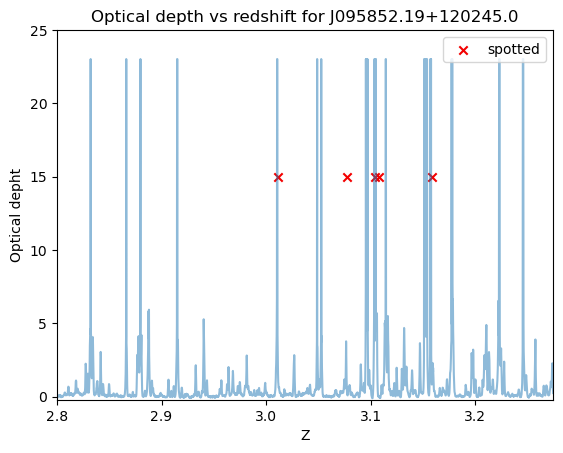

      z_corr      
------------------
3.0133004744425556
 3.013140607868194
3.1521346026149866


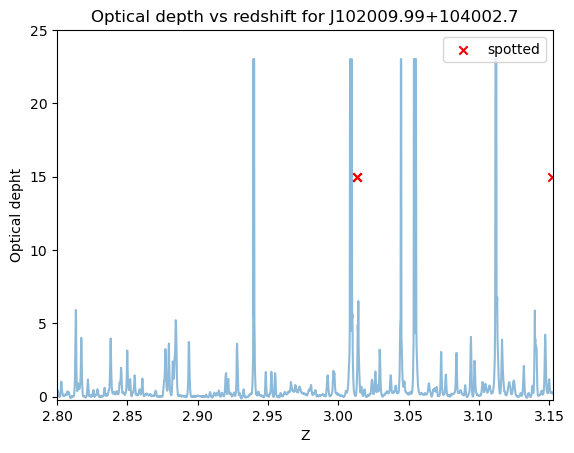

      z_corr      
------------------
2.8113730043660135
2.9142719242869357
3.0642347643671357
 3.208086414884185
 3.270418881819282
 3.415637124340138
3.4165936671535517
 3.468730369816975
3.6900011782029583
3.9086432158173903
 4.033232205920725
 4.120526376812321


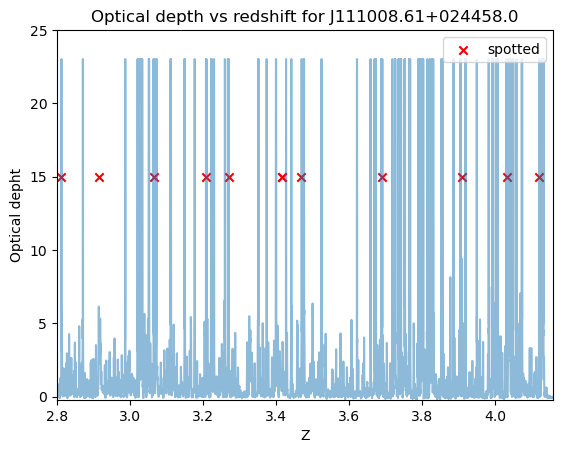

      z_corr      
------------------
  2.83624424667237
2.9848342325452366
 3.053157637366282
3.3172168239654645
3.3573633174521023
 3.575192642491509
3.5771398905561527
3.5754612915253525
 3.604696891311789
3.6082958875671114
3.6065153735951556
3.7159170953371996
 3.724122218190592
3.8098248902070564
 3.810684972377124
  3.81242152304113
3.8116541634841927
3.9056956758525927


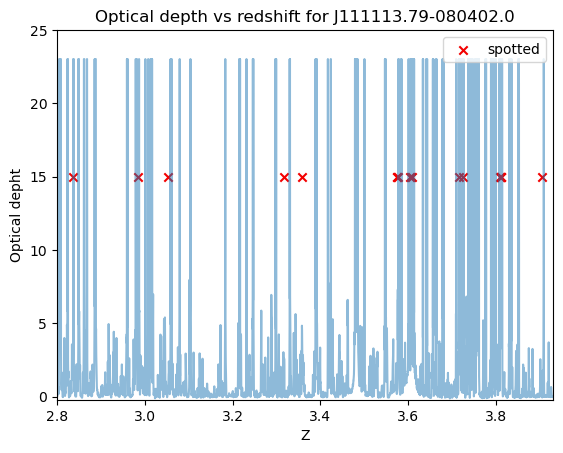

      z_corr     
-----------------
2.834141856700127
2.987601922613877


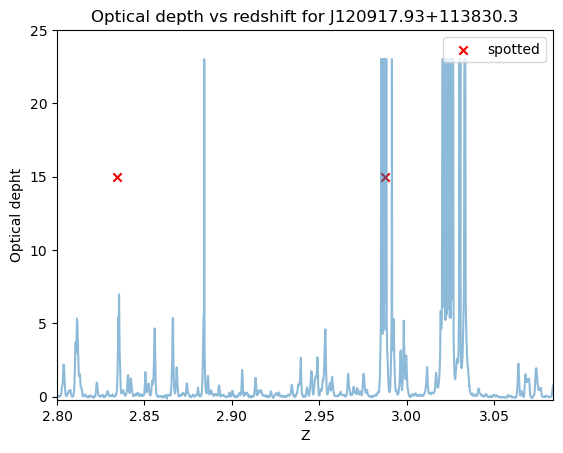

      z_corr      
------------------
 3.107571795011601
3.1813268561684587
3.2357644441986326
 3.282815535494959
3.3202842638610344
3.3206029978436686
3.3683361594498686
3.3782558803890255
3.4967369953130043
 3.536613713955406
3.5414296945080586
 3.544207376237597


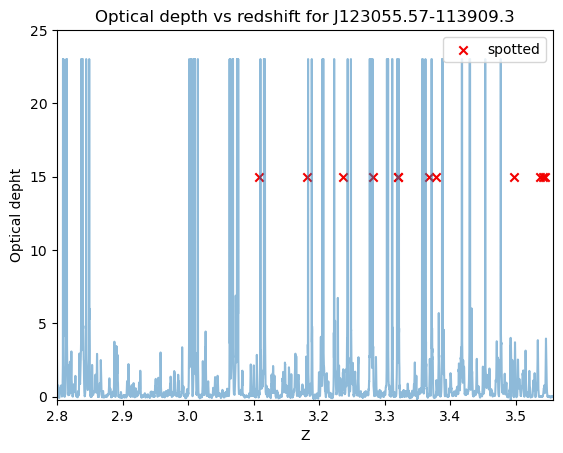

      z_corr      
------------------
 3.025105421959876
3.4370727187196395
3.4693298694708323
3.4997730197880794
3.5228252219166905
 3.521246539494866
 3.551199013253823
3.5627518988635796


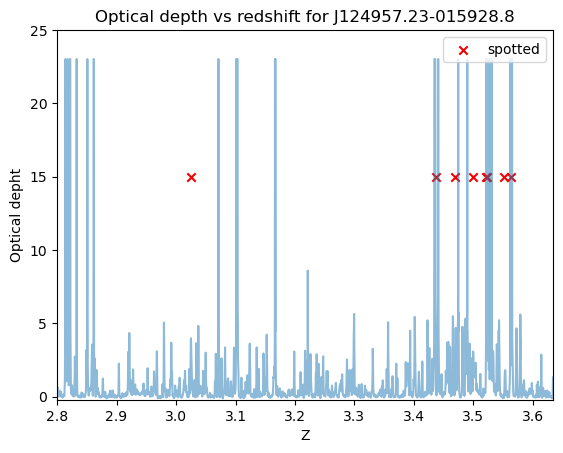

      z_corr      
------------------
 3.016967413991982
  3.01529880662208
3.0164785377511363
 3.086139682386206
3.1201113294381138
3.1240280605099815
  3.13142835183078
3.1396834903707695
3.1623360883914566
 3.344213217956996
3.3494699053429824
 3.473666250300399
3.5028419001214504


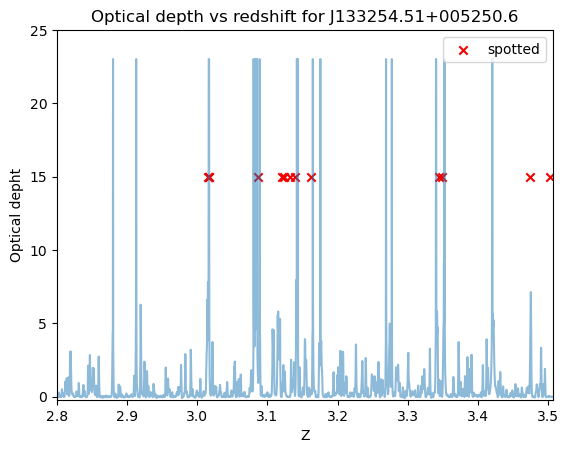

      z_corr      
------------------
 3.321193505002718
3.3211142132401164
 3.377896180596711
3.5647130747639655


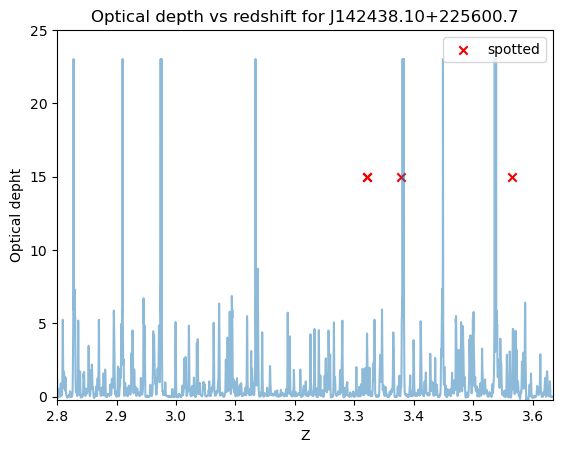

      z_corr      
------------------
2.9314987466737406
 2.939760167790252
2.9547455693408384
2.9499883151647865
2.9555278234466926
3.1072320785410823
 3.108021419751994
3.1106192515853754
 3.193000495686252
 3.199056044377621
 3.202463548873158
3.3774748225147895
 3.452384012588469
  3.48600595150896
3.4971366617489092


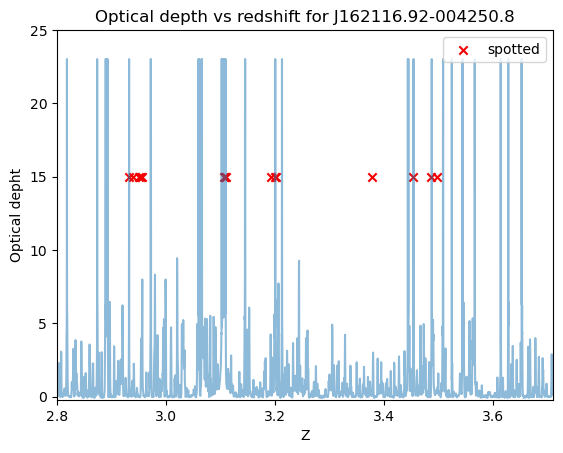

      z_corr      
------------------
3.0056068955513884
3.1362978200922584
 3.552228408713964


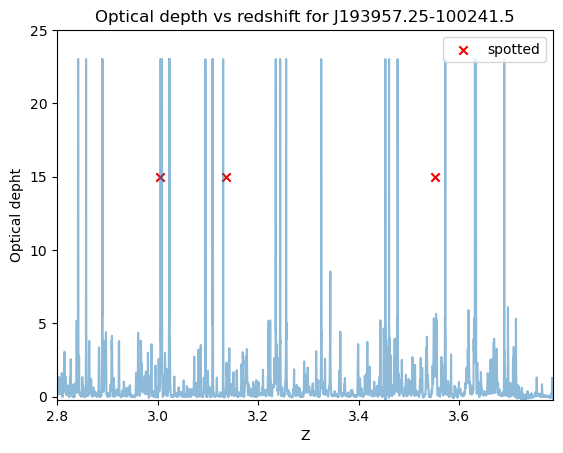

      z_corr      
------------------
3.1898830974861947
3.2325874561626233
3.2496032546712703
3.3015709057661846
 3.335369673484261
 3.335281746868362
3.4450521318217953
3.5499026229492405
3.5506420058556643
3.5542230171213713
3.6178518710238357
3.6350815321014514
3.6417129974392015
3.6683487670600776
 3.715684260562552


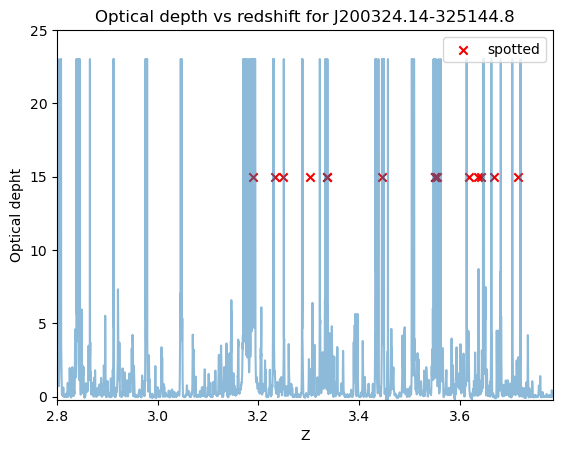

      z_corr      
------------------
2.9210374777139325
3.0355359166041196
 3.044548219380124
 3.085569158548952
3.0938132779555785
 3.093233761623516
3.0934735614850593
3.1406331591113275
 3.154274699506799
3.1579497492574014
 3.173316923717941
 3.175582033243431
3.1736966068320505
3.3971601028073226


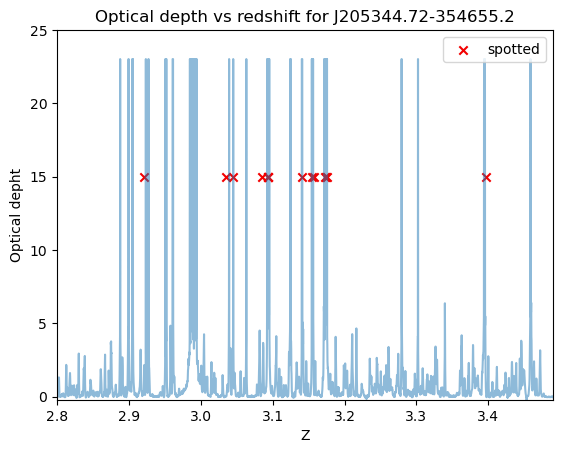

      z_corr      
------------------
2.9295913386083847
2.9402014833155676
3.0518818448306737
 3.062459446058847
3.1289590669213365
3.3029187572209704
3.3016498162869725
3.4104412523972045
3.4599377082270695
3.4648236304060056
3.4705288687785467
3.8944950239863605
 3.923322964008174


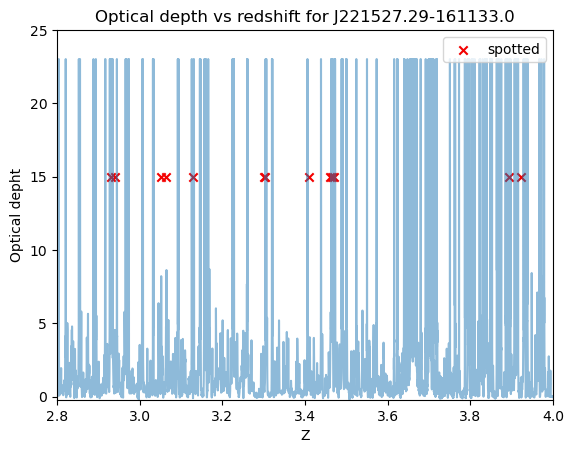

      z_corr      
------------------
2.9942489202083094
 3.102140095132131
 3.246680980469509
3.4093875642119227
3.4135273166887368
3.4176062448499036


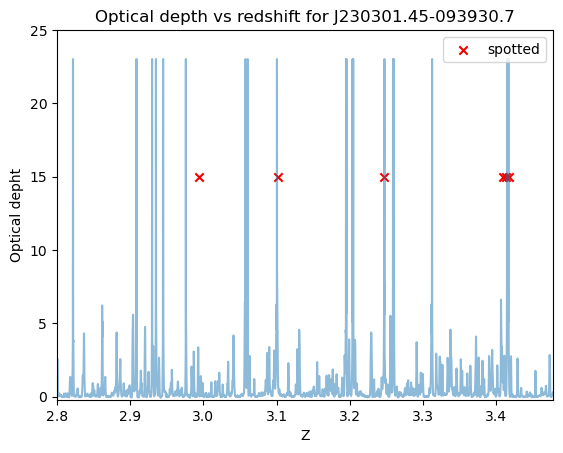

      z_corr      
------------------
2.8976508170564914
2.9947459601556754
 2.995135634930683
3.1371869709414253
3.1374768360781777
3.1762744553436364
3.1997928396636888
3.2732035577114487
  3.27374310739992
3.3620494064130857
3.3950618540188224


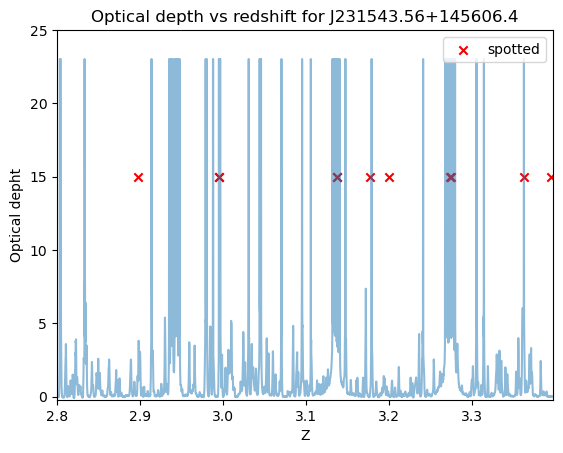

      z_corr      
------------------
3.0054470289770263
 3.049247834452131
3.0568741076170767
3.0559948414580864
 3.055035642011915
3.0576934238106817
 3.056718237707074
 3.064917394639661
3.0907427406451307
 3.289176937429307


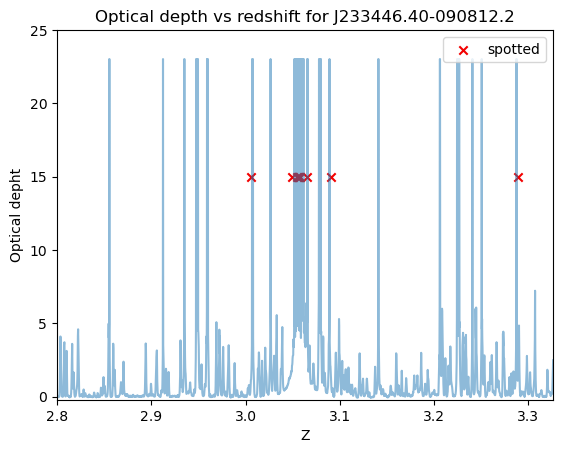

      z_corr      
------------------
2.9591835407722575
 3.031194368577127
3.0322791933056563
 3.034315834891911
 3.034394868929611
3.0363379472243714
 3.095527683252246
 3.115015144525764
3.1908093214439144
3.2588659757965615
               ...
 3.935638409960323
  3.94536491473889
3.9458316780952876
  3.94778107680499
3.9481502430065802
 3.965477581502015
 4.088700938521222
 4.154495348287282
 4.215946738384592
 4.224359716860389
Length = 29 rows


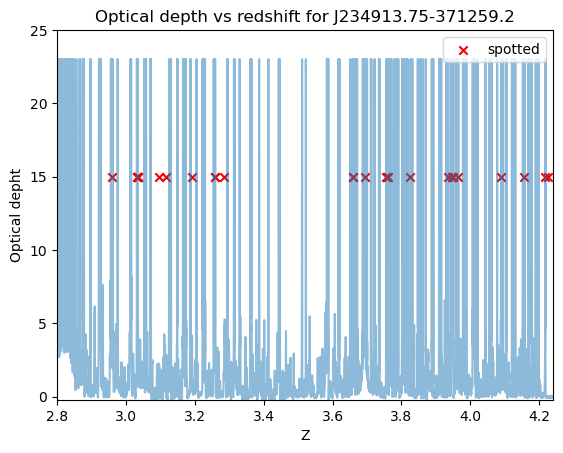

In [2]:
#limiting the redshift to every quasar in the correct redshift bins 

lowlim = 2.8 #xshooter (non è quello ma ok ) data limit 
Lyalfa = 1215.67
risultati = [] #it will give a list for every quasar 
for i in range (1, len(qsolist)):
    tabella=Table.read(qsolist[i])
    #print(qsolist[i].name)
    wave=tabella['wave']
    err = tabella['err']
    flux = tabella['flux']
    tabella['flux_filtrato'] = np.where(tabella['flux'] > 0, tabella['flux'], 1e-10) #if the flux value is negative i put a small number otherwise i can't get the optical depth 
    depth=-np.log(tabella['flux_filtrato']) #calculating optical depth 
    tabella['redshift'] = (wave / Lyalfa) - 1 #converting wavelength into redshift 
    redsh=qsolist[i].header["z_QSO"] #quasar redshift
    #print(redsh)
    #print(flux)
    lae_local = lae[((lae['FIELD'] == qsolist[i].name) & (lae['z_corr'] < redsh) & (lae['z_corr'] > lowlim))] #cutting the LAEs outside out limits 
    #print(redsh)
    print(lae_local['z_corr'])

    plt.figure() #plotting the relation and the associated LAEs
    plt.title(f'Optical depth vs redshift for {qsolist[i].name}')
    plt.xlabel('Z')
    plt.ylabel('Optical depht')
    plt.scatter(lae_local['z_corr'], np.full(len(lae_local), 15), label='spotted', color="#F30000", marker='x')
    plt.plot(tabella['redshift'],depth, alpha=0.5)
    plt.ylim(-0.2 , 25)
    plt.xlim(lowlim, redsh)
    plt.legend(loc='upper right')
    plt.show()
    plt.close()

    lae_local['veloc'] = 3e5 * ((redsh-lae_local['z_corr']) / (1 + lae_local['z_corr']))
    #print(min(lae_local['veloc']))
    #print(lae_local['veloc'])
    lae_local['rel_vel']= lae_local['veloc']-min(lae_local['veloc'])
    #print(lae_local['rel_vel'])
    for elem in lae_local:
        z0 = elem['z_corr'] #takes the central bin value, distance and velocity of this LAE
        R_kpc = elem['R_kpc']
        vrel = elem['rel_vel']

        # Redshift window ±0.1
        z_min = z0 - 0.1
        z_max = z0 + 0.1

        # Mask to select depth values in the selected range
        mask_depth = (tabella['redshift'] >= z_min) & (tabella['redshift'] <= z_max)
        depth_range = depth[mask_depth]

        # Calculating the mean depth in that region 
        if len(depth_range) > 0:
            depth_mean = np.mean(depth_range)
        else:
            depth_mean = None 

        risultati.append({
            "name": qsolist[i].name,
            "z_LAE": float(z0),
            "depth_mean": None if depth_mean is None else float(depth_mean),
            "R_kpc": float(R_kpc),
            "rel_vel": float(vrel)
        })
#print(risultati)
    


    

### Grid creation

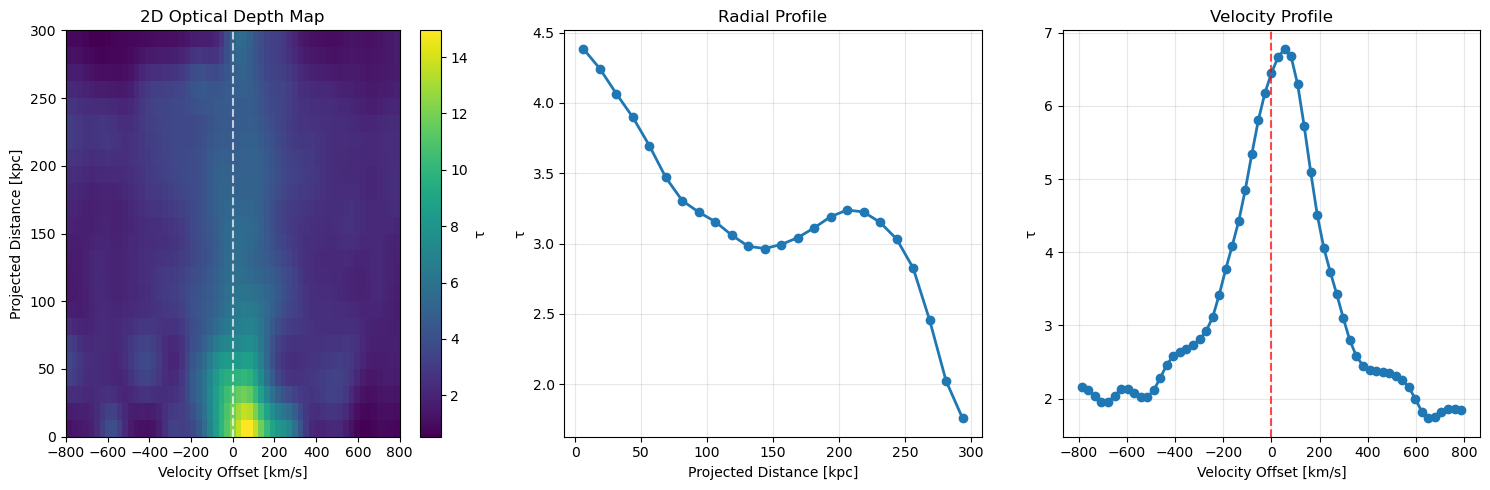

In [3]:
Lyalfa = 1215.67
c = 3e5  # km/s
lowlim = 2.8

# Binning 2D
r_bins = np.linspace(0, 300, 25)         # kpc
v_bins = np.linspace(-800, 800, 60)      # km/s

optical_depth_map = np.zeros((len(r_bins)-1, len(v_bins)-1))
count_map = np.zeros_like(optical_depth_map)

# main cycle over all QSOs
for i in range(1, len(qsolist)):
    
    tab = Table.read(qsolist[i])
    wave = tab['wave']
    flux = tab['flux']

    # putting the flux always positive (1e-10 is arbitrary small)
    flux_safe = np.where(flux > 0, flux, 1e-10)
    tau = -np.log(flux_safe)

    # converting wavelenght into redshift
    z_lya = wave / Lyalfa - 1

    # Redshift of the QSO
    z_qso = qsolist[i].header["z_QSO"]

    # Selecting only LAE within limits
    mask = z_lya < z_qso
    z_lya = z_lya[mask]
    tau = tau[mask]

    # filter for the LAE within limits
    lae_local = lae[(lae['FIELD'] == qsolist[i].name) &
                    (lae['z_corr'] < z_qso) &
                    (lae['z_corr'] > lowlim)]

    if len(lae_local) == 0:
        continue

    # loop over all the LAE of the QSO
    for elem in lae_local:

        z_lae = elem['z_corr']
        r_kpc = elem['R_kpc']

        # Velocity offset for every pixel
        v = c * (z_lya - z_lae) / (1 + z_lae)

        # Binning 2D (τ on a grid of r, v)
        for v_val, tau_val in zip(v, tau):
            i_r = np.digitize(r_kpc, r_bins) - 1
            i_v = np.digitize(v_val, v_bins) - 1
            if 0 <= i_r < len(r_bins)-1 and 0 <= i_v < len(v_bins)-1:
                if np.isfinite(tau_val):
                    optical_depth_map[i_r, i_v] += tau_val
                    count_map[i_r, i_v] += 1

# mean optical depth map
tau_map_mean = np.divide(optical_depth_map, count_map,
                         out=np.zeros_like(optical_depth_map),
                         where=count_map != 0)

tau_map_smooth = gaussian_filter(tau_map_mean, sigma=1.5)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
r_centers = (r_bins[:-1] + r_bins[1:]) / 2
v_centers = (v_bins[:-1] + v_bins[1:]) / 2
im = axes[0].pcolormesh(v_centers, r_centers, tau_map_smooth,
                        cmap='viridis', shading='auto')
axes[0].axvline(0, color='white', linestyle='--', alpha=0.7)
axes[0].set_xlabel("Velocity Offset [km/s]")
axes[0].set_ylabel("Projected Distance [kpc]")
axes[0].set_title("2D Optical Depth Map")
plt.colorbar(im, ax=axes[0], label="τ")
tau_radial = np.nanmean(tau_map_smooth, axis=1)
axes[1].plot(r_centers, tau_radial, 'o-', linewidth=2)
axes[1].set_xlabel("Projected Distance [kpc]")
axes[1].set_ylabel("τ")
axes[1].set_title("Radial Profile")
axes[1].grid(alpha=0.3)
tau_velocity = np.nanmean(tau_map_smooth, axis=0)
axes[2].plot(v_centers, tau_velocity, 'o-', linewidth=2)
axes[2].axvline(0, color='red', linestyle='--', alpha=0.7)
axes[2].set_xlabel("Velocity Offset [km/s]")
axes[2].set_ylabel("τ")
axes[2].set_title("Velocity Profile")
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()
